In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('electric_car_dataset.csv')
df.head()

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,encoded_driving_style,encoded_tire_type
0,50.0,12.29,0,0,1,15.5,0,1,47.0,-1.3,0.0,1
1,43.0,8.68,0,1,1,18.0,0,1,58.0,1.2,0.0,1
2,44.0,1.50,0,1,1,16.1,0,1,43.0,-0.7,0.0,1
3,76.0,14.44,0,1,0,19.0,0,1,76.0,2.2,0.0,1
4,15.0,6.84,1,0,0,16.1,0,1,23.0,-0.7,0.0,1


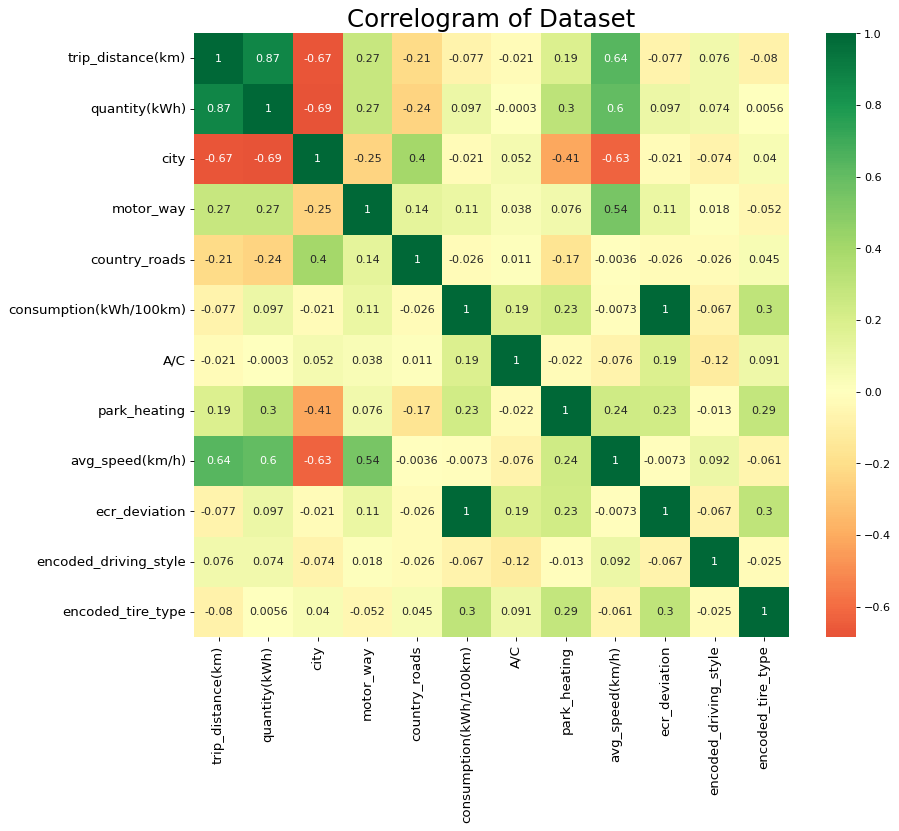

In [6]:
import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Dataset', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 800x640 with 0 Axes>

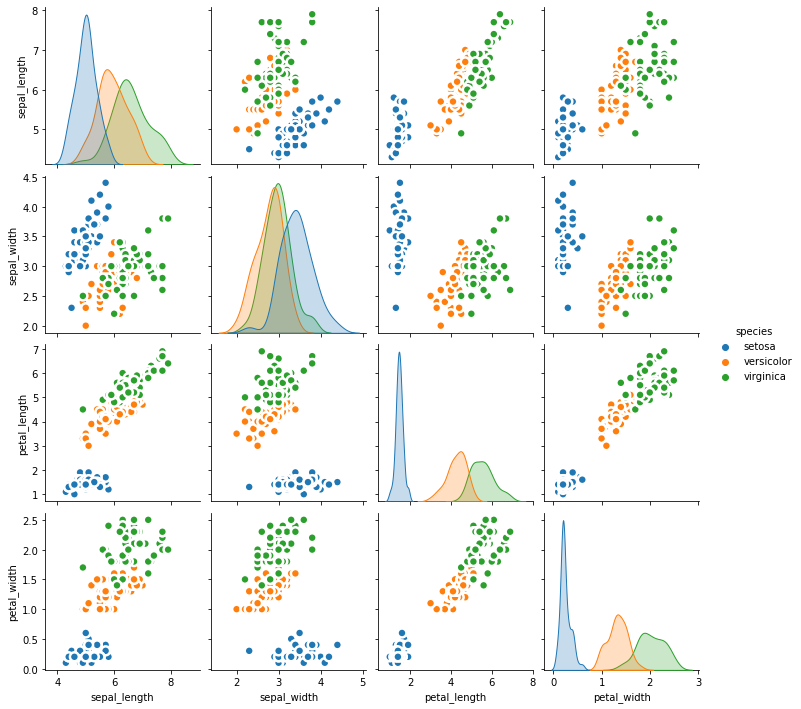

In [7]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_distance(km)       3262 non-null   float64
 1   quantity(kWh)           3262 non-null   float64
 2   city                    3262 non-null   int64  
 3   motor_way               3262 non-null   int64  
 4   country_roads           3262 non-null   int64  
 5   consumption(kWh/100km)  3262 non-null   float64
 6   A/C                     3262 non-null   int64  
 7   park_heating            3262 non-null   int64  
 8   avg_speed(km/h)         3262 non-null   float64
 9   ecr_deviation           3262 non-null   float64
 10  encoded_driving_style   3262 non-null   float64
 11  encoded_tire_type       3262 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 305.9 KB


In [3]:
df['encoded_driving_style'].value_counts()

1.0    2286
0.0     886
2.0      90
Name: encoded_driving_style, dtype: int64

In [4]:
df['encoded_tire_type'].value_counts()

0    1781
1    1481
Name: encoded_tire_type, dtype: int64

In [5]:
df.dtypes

trip_distance(km)         float64
quantity(kWh)             float64
city                        int64
motor_way                   int64
country_roads               int64
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
ecr_deviation             float64
encoded_driving_style     float64
encoded_tire_type           int64
dtype: object

In [6]:
Y = df['trip_distance(km)']
X = df.drop(columns=['trip_distance(km)'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [7]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
random_forest_reg.fit(X_train, Y_train)
print(X_train.values)
print(Y_train.values)

[[ 9.4   0.    1.   ... -1.9   1.    1.  ]
 [ 1.76  1.    1.   ... -8.    0.    0.  ]
 [14.3   0.    1.   ... -2.9   0.    0.  ]
 ...
 [ 1.86  1.    1.   ... -7.5   1.    1.  ]
 [ 0.36  1.    0.   ...  1.5   0.    1.  ]
 [ 4.1   1.    1.   ...  3.7   0.    1.  ]]
[ 81.  20. 103. ...  20.   2.  20.]


In [8]:
y_pred = random_forest_reg.predict(X_test)
print(Y_test.values)
print(y_pred)

[  4.   4.  20.  84.  33.   2.   2.  12.   1.  20.  81.  48.  96.  23.
  19.   1.  20.  16.  81.  38.  23.  27.  19.  20.  20.   5.  80.   6.
  33.  86.  20.  97.  20.  20.  19.  72.  20.  71.  20.  47.  43.  20.
  20.  19.   1.  35.  85.  20. 128. 118.  79. 100.  19.  19.  20.  20.
  90.  20.  86.  48.  20.  23.  22.  20.  20.  22.   7.  20.  20.  20.
  80.  19.  20.   2.  87.  34.  82.  20.  20.  20.  63.  45.  20.  21.
  87.  20.  20.  20.  71.  34.  41.  82.  20.   2.  20.  36.   5. 116.
   1.  83.  12.  48.  57.  83.  18.  20.   6.  15.  46.  46.  87.  21.
 102.  36.  20.  46.  20. 268.  22.   8.   2.   4.  57.  19.  84.  21.
 187. 101.   2. 128.  19.  20.  19.  20. 285.  71.   4.  20.   9.  19.
   2.  74.   8.  19. 176.  20.  87.  84.  20.  78.   1.  37.  20.  10.
  19. 162.  87.   2.  20.  20.  33.   8.   2.   1.  19.  20.  32.  12.
  86.  47.  38.  20.  20.  85.  50.  20.  31.  20.  12.  44.  32.  85.
 159.  22.  86.   2.  20.  20.  72.  20.  87.  20.  20.  20.  21.  27.
   2. 

In [17]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
print(X.shape, y.shape)

(3262, 11) (1000,)


In [23]:
pip install xgboost

You should consider upgrading via the 'C:\Users\Subinas\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [24]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

x, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
model = XGBRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -76.447 (3.859)


In [9]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.9047240694400221


In [10]:
x = np.array([[12.29,0,0,1,15.5,0,1,47.0,-1.3,0.0,1]])
y_pred2 = random_forest_reg.predict(x)
print(y_pred2)

[53.7]


C:\Users\Subinas\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [11]:
import pickle

In [12]:
data = {"model1": random_forest_reg}
with open('saved_steps1.pkl', 'wb') as file:
    pickle.dump(data, file)

In [13]:
with open('saved_steps1.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model1"]

In [14]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\Subinas\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([53.7])